## Library import + definition of the network


In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from library_2GMM import*

class TwoLayerDenoiser(nn.Module):
    def __init__(self, n, hidden_dim=256, L=3):
        super(TwoLayerDenoiser, self).__init__()
        self.lin0 = nn.Linear(42, L)                  # Time embedding φ → s
        self.lin1 = nn.Linear(n, hidden_dim)          # Input projection x → x1
        self.lin2 = nn.Linear(hidden_dim * L, n)      # Output projection

    def forward(self, x, alpha):
        batch_size = x.shape[0]
        alpha = alpha.unsqueeze(1)

        i_values = torch.arange(21, dtype=torch.float32, device=x.device)
        phi = torch.cat([torch.cos(alpha * i_values), torch.sin(alpha * i_values)], dim=1)

        s = self.lin0(phi)
        x1 = F.relu(self.lin1(x))

        outer_product = torch.einsum("bi,bj->bij", s, x1)  # Shape: (B, L, hidden_dim)
        x2 = outer_product.view(batch_size, -1)

        x_out = self.lin2(x2) + torch.cos(alpha).pow(2) * x
        return x_out





# Study of the RELU network in different scenarios

In [2]:
n = 128
p = 0.7
a = np.ones(n)

# 1st setting
samples = 5000,
epochs = 500,
hidden_dim = 256,
L = 3


In [3]:
num_samples = 5000
epochs = 500
hidden_dim = 256
L = 3

samples = construct_dataset(n, p, a, num_samples)
[samples_plus,samples_minus] = splidataset_on_cov(samples)

q1 = len(samples_plus)/num_samples
print(len(samples_plus), q1)

denoiser1_plus = TwoLayerDenoiser(n)
denoiser1_minus = TwoLayerDenoiser(n)

print()
training(denoiser1_plus, 
             samples_plus,  
             num_epochs=epochs, 
             criterion = nn.MSELoss(), 
             lr=1e-3, 
             weight_decay=1e-4,
             alpha_max = np.pi/2-0.01)

print()
training(denoiser1_minus, 
             samples_minus,  
             num_epochs=epochs, 
             criterion = nn.MSELoss(), 
             lr=1e-3, 
             weight_decay=1e-4,
             alpha_max = np.pi/2-0.01)

3505 0.701

Epoch [1/500] | Train Loss: 1018.7085 | Val Loss: 151.2246% | 
Epoch [51/500] | Train Loss: 0.5153 | Val Loss: 61.4568% | 
Epoch [101/500] | Train Loss: 0.5053 | Val Loss: 61.5266% | 
Epoch [151/500] | Train Loss: 0.5933 | Val Loss: 62.1712% | 
Epoch [201/500] | Train Loss: 0.5095 | Val Loss: 61.9412% | 
Epoch [251/500] | Train Loss: 0.5403 | Val Loss: 62.4082% | 
Epoch [301/500] | Train Loss: 0.5109 | Val Loss: 61.4168% | 
Epoch [351/500] | Train Loss: 0.5228 | Val Loss: 63.0928% | 
Epoch [401/500] | Train Loss: 0.5082 | Val Loss: 61.3541% | 
Epoch [451/500] | Train Loss: 0.5605 | Val Loss: 95.7914% | 
Loaded best model with validation loss: 60.3422%

Epoch [1/500] | Train Loss: 523.0293 | Val Loss: 131.2520% | 
Epoch [51/500] | Train Loss: 0.5618 | Val Loss: 55.6619% | 
Epoch [101/500] | Train Loss: 0.5165 | Val Loss: 55.5345% | 
Epoch [151/500] | Train Loss: 0.5007 | Val Loss: 53.3176% | 
Epoch [201/500] | Train Loss: 0.5371 | Val Loss: 53.6878% | 
Epoch [251/500] | Trai

0

# 2nd setting

In [4]:
num_samples = 20000
epochs = 500
hidden_dim = 256
L = 3

samples = construct_dataset(n, p, a, num_samples)
[samples_plus,samples_minus] = splidataset_on_cov(samples)

q2 = len(samples_plus)/num_samples
print(len(samples_plus), q2)

denoiser2_plus = TwoLayerDenoiser(n)
denoiser2_minus = TwoLayerDenoiser(n)

print()
training(denoiser2_plus, 
             samples_plus,  
             num_epochs=epochs, 
             criterion = nn.MSELoss(), 
             lr=1e-3, 
             weight_decay=1e-4,
             alpha_max = np.pi/2-0.01)

print()
training(denoiser2_minus, 
             samples_minus,  
             num_epochs=epochs, 
             criterion = nn.MSELoss(), 
             lr=1e-3, 
             weight_decay=1e-4,
             alpha_max = np.pi/2-0.01)

13978 0.6989

Epoch [1/500] | Train Loss: 215.6429 | Val Loss: 70.4975% | 
Epoch [51/500] | Train Loss: 0.5096 | Val Loss: 61.1622% | 
Epoch [101/500] | Train Loss: 0.5605 | Val Loss: 61.7074% | 
Epoch [151/500] | Train Loss: 0.5034 | Val Loss: 61.4063% | 
Epoch [201/500] | Train Loss: 0.5020 | Val Loss: 61.9977% | 
Epoch [251/500] | Train Loss: 0.8729 | Val Loss: 61.2919% | 
Epoch [301/500] | Train Loss: 0.5001 | Val Loss: 62.6219% | 
Epoch [351/500] | Train Loss: 0.5504 | Val Loss: 62.9790% | 
Epoch [401/500] | Train Loss: 0.5246 | Val Loss: 63.5753% | 
Epoch [451/500] | Train Loss: 0.8780 | Val Loss: 65.1508% | 
Loaded best model with validation loss: 60.7122%

Epoch [1/500] | Train Loss: 196.3206 | Val Loss: 60.5466% | 
Epoch [51/500] | Train Loss: 0.5194 | Val Loss: 52.8814% | 
Epoch [101/500] | Train Loss: 0.5151 | Val Loss: 52.6566% | 
Epoch [151/500] | Train Loss: 0.5468 | Val Loss: 52.6569% | 
Epoch [201/500] | Train Loss: 0.5974 | Val Loss: 52.7299% | 
Epoch [251/500] | Train

0

# 3rd setting 

In [5]:
num_samples = 20000
epochs = 2000
hidden_dim = 256
L = 3

samples = construct_dataset(n, p, a, num_samples)
[samples_plus,samples_minus] = splidataset_on_cov(samples)

q3 = len(samples_plus)/num_samples
print(len(samples_plus), q3)

denoiser3_plus = TwoLayerDenoiser(n)
denoiser3_minus = TwoLayerDenoiser(n)

print()
training(denoiser3_plus, 
             samples_plus,  
             num_epochs=epochs, 
             criterion = nn.MSELoss(), 
             lr=1e-3, 
             weight_decay=1e-4,
             alpha_max = np.pi/2-0.01)

print()
training(denoiser3_minus, 
             samples_minus,  
             num_epochs=epochs, 
             criterion = nn.MSELoss(), 
             lr=1e-3, 
             weight_decay=1e-4,
             alpha_max = np.pi/2-0.01)



13902 0.6951

Epoch [1/2000] | Train Loss: 31.4112 | Val Loss: 69.0471% | 
Epoch [51/2000] | Train Loss: 0.5159 | Val Loss: 61.7369% | 
Epoch [101/2000] | Train Loss: 0.5662 | Val Loss: 62.3620% | 
Epoch [151/2000] | Train Loss: 0.5094 | Val Loss: 61.4526% | 
Epoch [201/2000] | Train Loss: 0.5539 | Val Loss: 61.7234% | 
Epoch [251/2000] | Train Loss: 1.0115 | Val Loss: 61.7153% | 
Epoch [301/2000] | Train Loss: 0.5489 | Val Loss: 62.8228% | 
Epoch [351/2000] | Train Loss: 0.6546 | Val Loss: 62.9442% | 
Epoch [401/2000] | Train Loss: 0.7400 | Val Loss: 61.6273% | 
Epoch [451/2000] | Train Loss: 0.5100 | Val Loss: 62.7283% | 
Epoch [501/2000] | Train Loss: 0.5710 | Val Loss: 61.5033% | 
Epoch [551/2000] | Train Loss: 0.5157 | Val Loss: 65.4291% | 
Epoch [601/2000] | Train Loss: 0.5417 | Val Loss: 62.1707% | 
Epoch [651/2000] | Train Loss: 0.5089 | Val Loss: 63.6244% | 
Epoch [701/2000] | Train Loss: 0.5124 | Val Loss: 63.4355% | 
Epoch [751/2000] | Train Loss: 0.5139 | Val Loss: 62.7802%

0

# 4th setting

In [7]:
num_samples = 20000
epochs = 2000
hidden_dim = 512
L = 6

samples = construct_dataset(n, p, a, num_samples)
[samples_plus,samples_minus] = splidataset_on_cov(samples)

q4 = len(samples_plus)/num_samples
print(len(samples_plus), q4)

denoiser4_plus = TwoLayerDenoiser(n)
denoiser4_minus = TwoLayerDenoiser(n)

print()
training(denoiser4_plus, 
             samples_plus,  
             num_epochs=epochs, 
             criterion = nn.MSELoss(), 
             lr=1e-3, 
             weight_decay=1e-4,
             alpha_max = np.pi/2-0.01)

print()
training(denoiser4_minus, 
             samples_minus,  
             num_epochs=epochs, 
             criterion = nn.MSELoss(), 
             lr=1e-3, 
             weight_decay=1e-4,
            alpha_max = np.pi/2-0.01)

13877 0.69385

Epoch [1/2000] | Train Loss: 64.2487 | Val Loss: 69.0190% | 
Epoch [51/2000] | Train Loss: 0.5599 | Val Loss: 62.4810% | 
Epoch [101/2000] | Train Loss: 0.5039 | Val Loss: 61.5810% | 
Epoch [151/2000] | Train Loss: 0.5624 | Val Loss: 63.8167% | 
Epoch [201/2000] | Train Loss: 0.6928 | Val Loss: 61.8488% | 
Epoch [251/2000] | Train Loss: 0.5484 | Val Loss: 63.2464% | 
Epoch [301/2000] | Train Loss: 0.5169 | Val Loss: 62.8692% | 
Epoch [351/2000] | Train Loss: 0.5572 | Val Loss: 61.9004% | 
Epoch [401/2000] | Train Loss: 0.5018 | Val Loss: 62.4213% | 
Epoch [451/2000] | Train Loss: 0.5065 | Val Loss: 63.0993% | 
Epoch [501/2000] | Train Loss: 0.5594 | Val Loss: 61.3014% | 
Epoch [551/2000] | Train Loss: 0.5040 | Val Loss: 62.4333% | 
Epoch [601/2000] | Train Loss: 0.5051 | Val Loss: 61.9956% | 
Epoch [651/2000] | Train Loss: 0.5654 | Val Loss: 62.4977% | 
Epoch [701/2000] | Train Loss: 0.4971 | Val Loss: 63.1366% | 
Epoch [751/2000] | Train Loss: 0.5912 | Val Loss: 61.7666

0

Final time T: 10.450529098510742
Final time T: 10.450529098510742
Final time T: 10.450529098510742
Final time T: 10.450529098510742


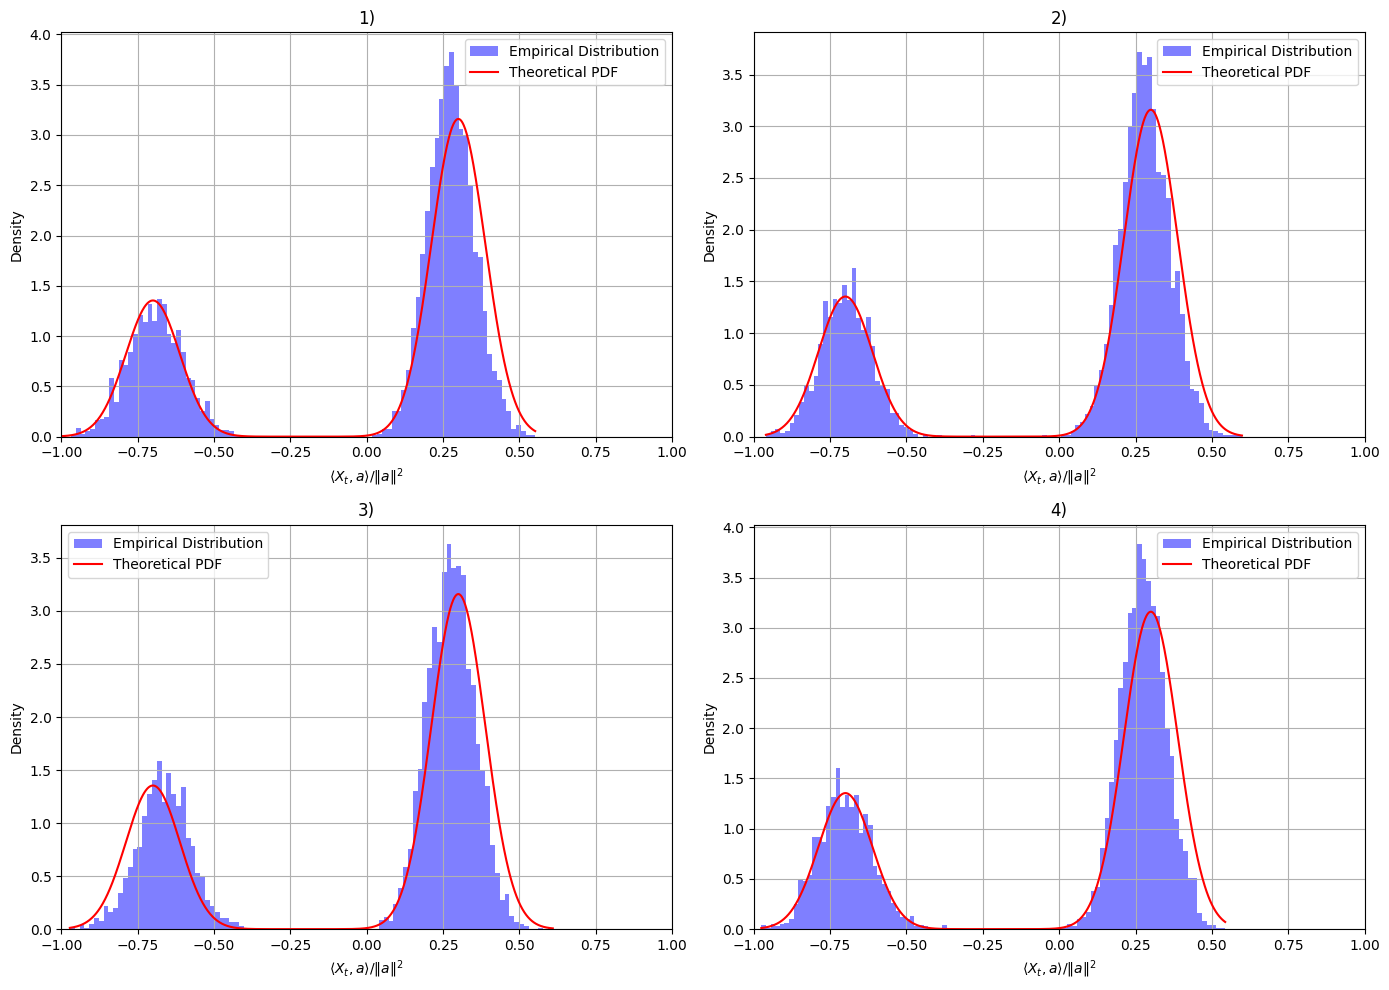

In [9]:
alpha_max = np.pi/2-0.3
K = 200

# Assume you've already created these with different seeds/models
target_samples1 = forward_sampling_mixture_aware(alpha_max, K, denoiser1_plus, denoiser1_minus, n, q1, num_samples_target=5000, path=False)
target_samples2 = forward_sampling_mixture_aware(alpha_max, K, denoiser2_plus, denoiser2_minus, n, q2, num_samples_target=5000, path=False)
target_samples3 = forward_sampling_mixture_aware(alpha_max, K, denoiser3_plus, denoiser3_minus, n, q3, num_samples_target=5000, path=False)
target_samples4 = forward_sampling_mixture_aware(alpha_max, K, denoiser4_plus, denoiser4_minus, n, q4, num_samples_target=5000, path=False)


datasets = [target_samples1, target_samples2, target_samples3, target_samples4]
titles = ["1)", "2)", "3)", "4)"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, samples in enumerate(datasets):
    plot_projected_dataset(samples, a, p, n, ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_xlim(-1, 1)

plt.tight_layout()
plt.show()


# Comparison with the true conditional mean
using setting 2